<a href="https://colab.research.google.com/github/oownus1/AutoML/blob/main/Pycaret_%EB%B6%84%EB%A5%982_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyCaret 설치

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.4 MB/s 
     |████████████████████████████████| 262 kB 38.1 MB/s 
     |████████████████████████████████| 17.9 MB 417 kB/s 
     |████████████████████████████████| 3.3 MB 53.7 MB/s 
     |████████████████████████████████| 88 kB 1.0 MB/s 
     |████████████████████████████████| 2.0 MB 65.1 MB/s 
     |████████████████████████████████| 10.4 MB 42.1 MB/s 
     |████████████████████████████████| 1.3 MB 42.6 MB/s 
     |████████████████████████████████| 25.9 MB 52.2 MB/s 
     |████████████████████████████████| 1.7 MB 43.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 134 kB 66.5 MB/s 
     |████████████████████████████████|

In [2]:
!pip install -U Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 5.0 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


Google Colab 사용자의 경우 다음의 코드를 실행합니다.

In [1]:
from pycaret.utils import enable_colab

enable_colab()

Colab mode enabled.


## 필요한 모듈 import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.options.display.max_columns = None

## 실습을 위한 데이터셋 로드

In [3]:
dataset = sns.load_dataset('titanic')
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# 데이터셋 크기 출력
dataset.shape

(891, 15)

In [5]:
train = dataset.sample(frac=0.8, random_state=786)
test = dataset.drop(train.index)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)
print('학습용 데이터셋: ' + str(train.shape))
print('예측용 데이터셋: ' + str(test.shape))

학습용 데이터셋: (713, 15)
예측용 데이터셋: (178, 15)


### 컬럼 설명

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

## 1-1) 셋업 setup

머신러닝 예측 방식에 따라 다음 중 하나를 골라 import 합니다.

In [6]:
from pycaret.classification import *    # 분류
# from pycaret.regression import *      # 회귀
# from pycaret.clustering import *      # 군집
# from pycaret.anomaly import *         # 이상 탐지
# from pycaret.arules import *          # 연관 규칙

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


**`setup` 함수**

- `data`: 학습할 데이터셋을 지정합니다.
- `target`: 예측할 대상(target) 컬럼을 지정합니다.
- `session_id`: SEED 값을 지정합니다.

- `profile`: True로 설정시 데이터 프로파일링을 출력합니다.

In [7]:
# 이것으로 컬럼명 확인 후 삭제할 컬럼 지정
train.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,NaN,0,0,15.5,Q,Third,man,True,NaN,Queenstown,no,True


`ignore_features`에는 분석 / 학습에 무시할 컬럼을 지정합니다.

- `alive`, `embark_town`, `class`는 다른 컬럼과 겹치는 컬럼이므로 제외합니다.

In [8]:
# 삭제할 컬럼명 지정하여 ignore_features에 넣어준다
ignore_features=['alive', 'embark_town', 'class']

`categorical_features`에는 범주형 컬럼을 지정합니다.
- `pclass`, `sex`, `embarked` 컬럼은 범주형 특성을 가집니다. 즉, 카테고리화 할 수 있는 컬럼을 의미합니다.

In [9]:
#컬럼값들을 더 디테일하게 명시해주면 된다.
#수동으로 지정
categorical_features=['pclass', 'sex', 'embarked']

`numeric_features`에는 수치형 컬럼을 지정합니다.
- `age`, `fare`, `sibsp`, `parch`는 숫자형태의 데이터를 가지므로 수치형 컬럼에 지정합니다.

In [10]:
#얘네는 정수형
numeric_features=['age', 'fare', 'sibsp', 'parch']

In [11]:
#명시해 준 것들을 다음과 같이 넣어주면된다. 
clf = setup(data=train, 
            target='survived', 
            ignore_features=ignore_features,           # 분석/학습에 고려하지 않을 feature(컬럼) 제거
            categorical_features=categorical_features, # 범주형 컬럼 지정
            numeric_features=numeric_features,         # 수치형 컬럼 지정
            session_id=123, 
            silent=True,
            ) 

,Description,Value
0,session_id,123
1,Target,survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(713, 15)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


## 1-2) 고급 데이터 전처리

[문서 링크](https://pycaret.readthedocs.io/en/latest/api/classification.html)

### `categorical_imputation`: str, default = ‘constant’

범주형 데이터에 대한 결측치를 어떻게 채워줄지에 대한 전략을 지정합니다. 기본 값은 `constant`이며 `constant`로 지정시 **not_available**로 채워지게 됩니다.

`mode`로 변경시 최빈 값으로 채워지게 됩니다.

In [12]:
clf = setup(data=train, 
            target='survived', 
            ignore_features=ignore_features,           # 분석/학습에 고려하지 않을 feature(컬럼) 제거
            categorical_features=categorical_features, # 범주형 컬럼 지정
            numeric_features=numeric_features,         # 수치형 컬럼 지정
            categorical_imputation='mode',             # 범주형 결측치를 최빈값으로 채움
            session_id=123, 
            silent=True,
            ) 

,Description,Value
0,session_id,123
1,Target,survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(713, 15)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


`high_cardinality_features`: list of str, default = None

범주형의 데이터 종류(level)가 많은 경우 우리는 몇 가지의 대분류로 압축하여 데이터를 단순화 할 수 있습니다.
```
(예시)
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                           29
Ecuador                          28
Ireland                          24
Hong                             20
Cambodia                         19
Trinadad&Tobago                  19
Laos                             18
Thailand                         18
Yugoslavia                       16
Outlying-US(Guam-USVI-etc)       14
Honduras                         13
Hungary                          13
Scotland                         12
Holand-Netherlands                1
Name: native_country, dtype: int64
```

위의 국가별 범주를 살펴봤을 때 너무 많은 범주가 존재하기 때문에 효율적인 학습이 어렵습니다.

우리는 임의의 그룹을 만들어 단순화할 수 있습니다.

```
income_01 = ['Jamaica',
 'Haiti',
 'Puerto-Rico',
 'Laos',
 'Thailand',
 'Ecuador',]

income_02 = ['Outlying-US(Guam-USVI-etc)',
 'Honduras',
 'Columbia',
 'Dominican-Republic',
 'Mexico',
 'Guatemala',
 'Portugal',
 'Trinadad&Tobago',
 'Nicaragua',
 'Peru',
 'Vietnam',
 'El-Salvador',]

income_03 = ['Poland',
 'Ireland',
 'South',
 'China',]

income_04 = [
    'United-States',
]
income_05 = [
 'Greece',
 'Scotland',
 'Cuba',
 'Hungary',
 'Hong',
 'Holand-Netherlands',
]
income_06 = [
 'Philippines',
 'Canada',
]
income_07 = [
 'England',
 'Germany',
]

income_08 = [
 'Italy',
 'India',
 'Japan',
 'France',
 'Yugoslavia',
 'Cambodia',
]

income_09 = [
 'Taiwan',
 'Iran',
]

income_other=['?', ]
```

```
(결과)
income_04       29170
income_02        1157
income_other      583
income_06         319
income_01         303
income_08         299
income_03         239
income_07         227
income_05         170
income_09          94
Name: country_bin, dtype: int64
```

`high_cardinality_features`에 리스트 형식으로 컬럼을 지정해주면 됩니다.

### imputation_type: str, default = ‘simple’

`imputation`은 결측치를 채우는 전략입니다.

`imputation_type`은 기본 `simple`이 지정되어 있어, 결측단순 값으로 치환됩니다. 예를 들면 **평균**, **중앙값**과 같은 단순 값으로 말이죠.

하지만, 머신러닝 알고리즘을 활용하여 예측하여 값을 채워 줄 수 있습니다. 적용하기 위해서는 `imputation_type='iterative'`로 설정합니다.

`iterative_imputation_iters`은 iteration 횟수를 지정하는데, 기본 5가 설정되어 있습니다.
- 너무 숫자를 늘리게 되면 과적합될 수 있습니다.

In [13]:
clf = setup(data=train, 
            target='survived', 
            ignore_features=ignore_features,           # 분석/학습에 고려하지 않을 feature(컬럼) 제거
            categorical_features=categorical_features, # 범주형 컬럼 지정
            numeric_features=numeric_features,         # 수치형 컬럼 지정
            categorical_imputation='mode',             # 범주형 결측치를 최빈값으로 채움
            imputation_type='iterative',               # 결측치를 lightgbm으로 예측하여 채움
            iterative_imputation_iters=10,             # imputation iteration 지정
            session_id=123, 
            silent=True,
            ) 

,Description,Value
0,session_id,123
1,Target,survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(713, 15)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


### normalize / normalize_method

- `normalize`: bool, default = False
- `normalize_method`: str, default = ‘zscore’

`normalize`는 데이터의 정규화/표준화 여부를 설정합니다.

`normalize_method`는 기본 'zscore'가 설정되어 있습니다.

- 'minmax': scales and translates each feature individually such that it is in the range of 0 - 1.
- 'maxabs': scales and translates each feature individually such that the maximal absolute value of each feature will be 1.0.
- 'robust': scales and translates each feature according to the Interquartile range. When the dataset contains outliers, robust scaler often gives better results.

In [14]:
clf = setup(data=train, 
            target='survived', 
            ignore_features=ignore_features,           # 분석/학습에 고려하지 않을 feature(컬럼) 제거
            categorical_features=categorical_features, # 범주형 컬럼 지정
            numeric_features=numeric_features,         # 수치형 컬럼 지정
            categorical_imputation='mode',             # 범주형 결측치를 최빈값으로 채움
            imputation_type='iterative',               # 결측치를 lightgbm으로 예측하여 채움
            iterative_imputation_iters=10,             # imputation iteration 지정
            normalize=True,                            # 정규화 적용
            normalize_method='zscore',                 # 정규화 방식 지정
            session_id=123, 
            silent=True,
            ) 

,Description,Value
0,session_id,123
1,Target,survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(713, 15)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


## 2-1) 모든 모델에 대한 학습 compare_models

`compare_models`
- `sort`: 정렬 기준이 되는 평가지표를 설정합니다.
- `n_select`: 상위 N개의 알고리즘을 선택합니다.
- `fold`: Cross Validation 평가 Fold의 개수를 지정합니다.

In [15]:
best_models = compare_models(sort='Accuracy', n_select=3, fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8417,0.8941,0.7580,0.8277,0.7882,0.6625,0.6670,0.012
ridge,Ridge Classifier,0.8397,0.0000,0.7529,0.8271,0.7851,0.6580,0.6627,0.010
lr,Logistic Regression,0.8356,0.8909,0.7578,0.8139,0.7815,0.6503,0.6545,0.534
lightgbm,Light Gradient Boosting Machine,0.8316,0.8770,0.7630,0.8017,0.7796,0.6437,0.6465,0.080
knn,K Neighbors Classifier,0.8216,0.8659,0.7219,0.8075,0.7592,0.6185,0.6239,0.090
gbc,Gradient Boosting Classifier,0.8116,0.8702,0.7169,0.7886,0.7473,0.5981,0.6033,0.060
ada,Ada Boost Classifier,0.8076,0.8560,0.7220,0.7795,0.7458,0.5917,0.5967,0.060
et,Extra Trees Classifier,0.8016,0.8488,0.7013,0.7747,0.7326,0.5759,0.5811,0.356
rf,Random Forest Classifier,0.8015,0.8724,0.7066,0.7786,0.7343,0.5773,0.5851,0.358
nb,Naive Bayes,0.7915,0.8563,0.7941,0.7150,0.7497,0.5730,0.5783,0.010


### 모델 블렌딩 blend_models

- `compare_models`로 추출된 best 모델에 대하여 모델 블렌딩하여 성능 개선
- `Soft` voting 방식으로 `estimator_list`에 적용된 모델을 앙상블
- `Voting Ensemble`

In [16]:
blended_models = blend_models(best_models, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8900,0.0,0.8205,0.8889,0.8533,0.7656,0.7671
1,0.7900,0.0,0.7179,0.7368,0.7273,0.5566,0.5567
2,0.8500,0.0,0.6667,0.9286,0.7761,0.6678,0.6886
3,0.8300,0.0,0.7692,0.7895,0.7792,0.6410,0.6412
4,0.8485,0.0,0.8158,0.7949,0.8052,0.6813,0.6814
Mean,0.8417,0.0,0.7580,0.8277,0.7882,0.6625,0.6670
Std,0.0324,0.0,0.0589,0.0703,0.0412,0.0673,0.0686


## 2-2) 단일 모델 생성 create_model / 배깅 앙상블 ensemble_

단일 모델을 생성하기 위해서는 `create_model`로 생성할 수 있습니다.

단일 모델 리스트
- `lr` - Logistic Regression
- `knn` - K Neighbors Classifier
- `nb` - Naive Bayes
- `dt` - Decision Tree Classifier
- `svm` - SVM - Linear Kernel
- `rbfsvm` - SVM - Radial Kernel
- `gpc` - Gaussian Process Classifier
- `mlp` - MLP Classifier
- `ridge` - Ridge Classifier
- `rf` - Random Forest Classifier
- `qda` - Quadratic Discriminant Analysis
- `ada` - Ada Boost Classifier
- `gbc` - Gradient Boosting Classifier
- `lda` - Linear Discriminant Analysis
- `et` - Extra Trees Classifier
- `xgboost` - Extreme Gradient Boosting
- `lightgbm` - Light Gradient Boosting Machine
- `catboost` - CatBoost Classifier

In [17]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.6583,0.5000,0.6667,0.5714,0.3478,0.3563
1,0.8600,0.8617,0.9000,0.7826,0.8372,0.7154,0.7208
2,0.7800,0.7833,0.8000,0.6957,0.7442,0.5528,0.5570
3,0.8000,0.7917,0.7500,0.7500,0.7500,0.5833,0.5833
4,0.7000,0.6511,0.5263,0.6250,0.5714,0.3433,0.3463
5,0.7800,0.7929,0.6316,0.7500,0.6857,0.5184,0.5229
6,0.8200,0.8107,0.7895,0.7500,0.7692,0.6218,0.6224
7,0.7200,0.6969,0.6316,0.6316,0.6316,0.4058,0.4058
8,0.9000,0.8888,0.8421,0.8889,0.8649,0.7856,0.7863


### 배깅 앙상블 ensemble_model

In [18]:
#앙상블을 하면 성능이 더 좋아짐
ensembled_models = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7800,0.7808,0.5500,0.8462,0.6667,0.5133,0.5398
1,0.8400,0.8992,0.7000,0.8750,0.7778,0.6552,0.6651
2,0.8200,0.8000,0.7500,0.7895,0.7692,0.6218,0.6224
3,0.8200,0.8558,0.8000,0.7619,0.7805,0.6281,0.6286
4,0.7600,0.7504,0.5263,0.7692,0.6250,0.4575,0.4753
5,0.8600,0.8345,0.7368,0.8750,0.8000,0.6935,0.6996
6,0.8000,0.9032,0.7895,0.7143,0.7500,0.5840,0.5861
7,0.7800,0.7776,0.6842,0.7222,0.7027,0.5283,0.5288
8,0.8800,0.9796,0.8947,0.8095,0.8500,0.7504,0.7530


## 3) 모델 예측 predict_model

- `Label`에 예측된 결과를 확인할 수 있습니다.
- `Score`에 예측된 결과의 **확률** 값을 확인할 수 있습니다.

In [19]:
predict_model(data=dataset, estimator=ensembled_models)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8822,0.9307,0.8041,0.8786,0.8397,0.7468,0.7486


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Label,Score
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,0.9
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,1.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,0.9
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,1.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0,1.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,1.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0,0.9
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1,0.7


## 4) 모델 분석 interpret_model


### 특성 중요도 Feature Importances

각 특성별 종속변수(Y)에 미치는 영향도를 계산

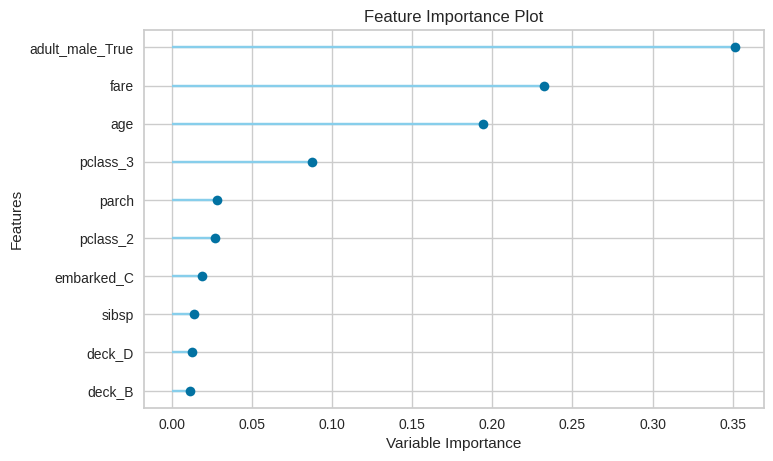

In [20]:
#주요하게 작용했던 컬럼별로 순서화되어 시각화 출력됨
plot_model(dt, plot='feature')

### 오차행렬 confusion_matrix

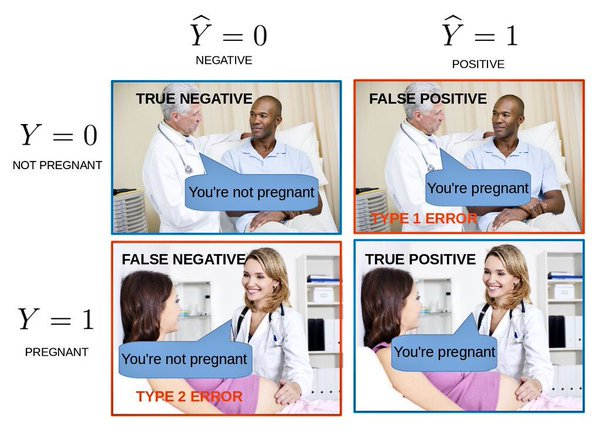

In [21]:
from IPython.display import Image

Image('https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg', width=750)

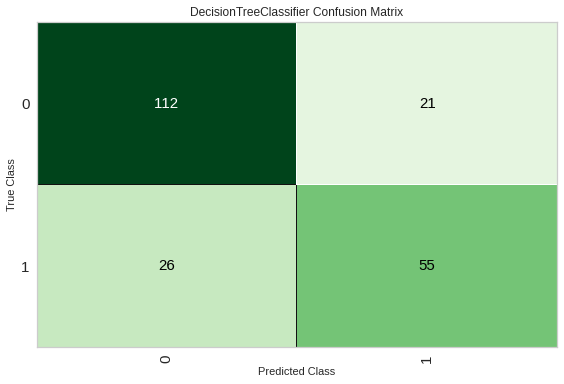

In [22]:
plot_model(dt, plot='confusion_matrix')

**정밀도 Precision**

- TP / (FP + TP)
- 중요 사례: 스팸 분류 (스팸으로 분류한 메일 중에서 중요 메일이 있는 경우
                
**재현율 Recall**

- TP / (FN + TP)
- 중요 사례: 암 진단 (암 환자를 건강으로 분류하는 경우)

### 섀플리 분석 SHAP(SHapley Additive exPlanations)

In [23]:
#사망과 생존 분류 -> 색깔과 음과 양의 조합으로 분류한다.

- 게임 이론에서 처음 등장하였으며, 머신러닝 모델을 분석하기 시작하면서 다시 주목받고 있음
- 섀플리 값 (SHAP Value)는 각각의 데이터가 종속변수 (Y)에 미치는 영향도를 계산한 값 (기여도를 수치화)


In [24]:
# 섀플리 설치
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


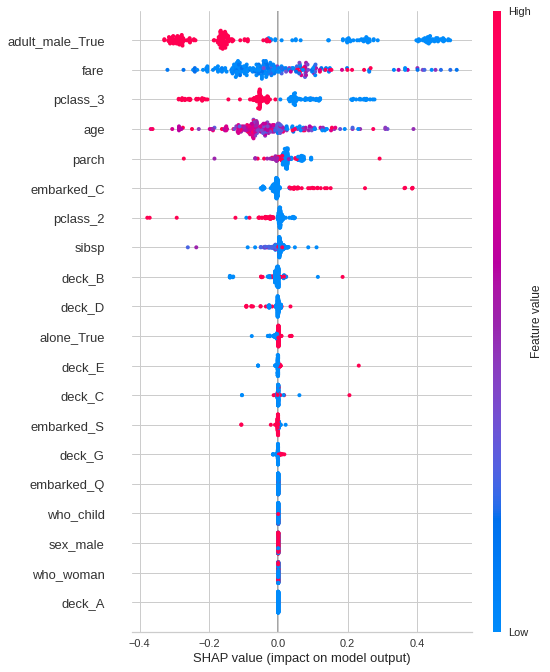

In [25]:
interpret_model(dt)

In [26]:
interpret_model(dt, plot='reason')